# TP3 : FrameNet et WordNet

**Module :** Ingénierie des Connaissances  
**Étudiant(e) :** Nassima RHANNOUCH_IID3

---

## Objectifs du TP
1. Utiliser **WordNet** pour identifier les synsets des noms et verbes dans une phrase ou un paragraphe.  
2. Utiliser **FrameNet** pour identifier les rôles sémantiques associés aux verbes.  
3. Construire des **graphes sémantiques** représentant les relations entre mots et leurs synsets.  
4. Visualiser les graphes avec **NetworkX** et **Matplotlib** pour l’analyse des relations sémantiques.


# Exercice 1 : Graphe sémantique

**Phrase à analyser :**  
"The cat chased the mouse in the garden."

**Instructions :**  
1. Identifier tous les noms et verbes de la phrase.  
2. Trouver le synset correct pour chaque mot (WordNet).  
3. Construire un graphe sémantique où :  
   - Les **nœuds** représentent les synsets (étiquetés avec le lemme principal).  
   - Les **arêtes** représentent les relations :  
     - **is-a** (hyperonymes / hyponymes)  
     - **part-of** (méronymes)  
4. Dessiner le graphe visuellement en utilisant NetworkX ou Graphviz.


In [29]:
import nltk
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sentence = "The cat chased the mouse in the garden."

tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]

print("Noms :", nouns)
print("Verbes :", verbs)


Noms : ['cat', 'mouse', 'garden']
Verbes : ['chased']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
nltk.download('wordnet')
nltk.download('omw-1.4')

synsets = {
    "cat": wn.synset("cat.n.01"),
    "mouse": wn.synset("mouse.n.01"),
    "garden": wn.synset("garden.n.01"),
    "chase": wn.synset("chase.v.01")
}

for word, syn in synsets.items():
    print(f"{word} → {syn.name()} : {syn.definition()}")


cat → cat.n.01 : feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
mouse → mouse.n.01 : any of numerous small rodents typically resembling diminutive rats having pointed snouts and small ears on elongated bodies with slender usually hairless tails
garden → garden.n.01 : a plot of ground where plants are cultivated
chase → chase.v.01 : go after with the intent to catch


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
G = nx.DiGraph()

for word, syn in synsets.items():
    # Nœud principal
    G.add_node(syn.name(), label=syn.lemma_names()[0])

    # Relations is-a (hyperonymes)
    for hyper in syn.hypernyms():
        G.add_node(hyper.name(), label=hyper.lemma_names()[0])
        G.add_edge(syn.name(), hyper.name(), relation="is-a")

    # Relations part-of (méronymes)
    for mero in syn.part_meronyms():
        G.add_node(mero.name(), label=mero.lemma_names()[0])
        G.add_edge(syn.name(), mero.name(), relation="part-of")


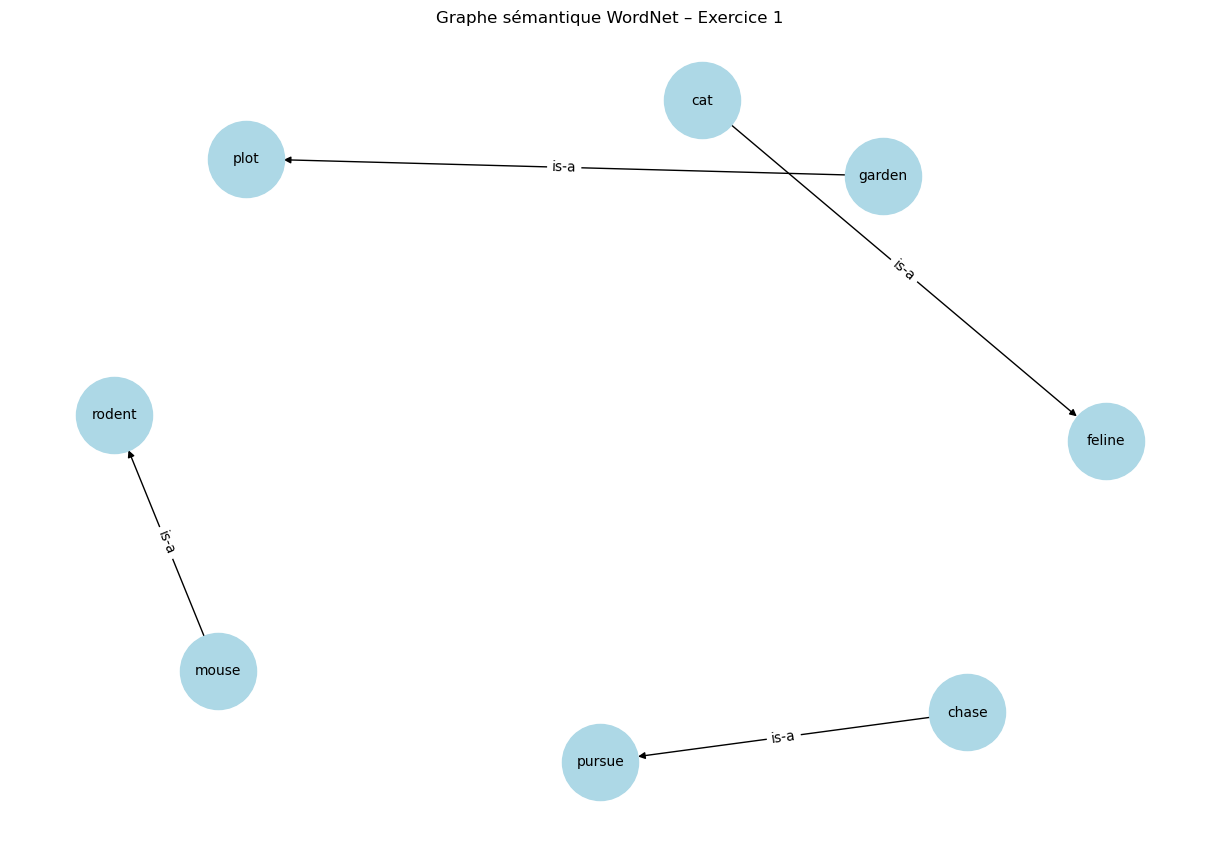

In [33]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G,k=2.0,  seed=42)

# Dessin des nœuds
nx.draw(
    G, pos,
    node_size=3000,
    node_color="lightblue",
    with_labels=False
)

# Labels des nœuds
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, node_labels, font_size=10)

# Labels des arêtes
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graphe sémantique WordNet – Exercice 1")
plt.show()


# Exercice 2 : Graphe sémantique avec synonymes et rôles

**Phrase à analyser :**  
"The chef prepared a meal and served it to the guests."

**Instructions :**  
1. Identifier tous les noms et verbes de la phrase.  
2. Construire un graphe sémantique où :  
   - Inclure les **synonymes** comme nœuds supplémentaires reliés aux nœuds principaux.  
   - Inclure les **hyperonymes** et **hyponymes**.  
3. Dessiner des arêtes entre **verbes et noms** montrant les **rôles sémantiques**.


In [34]:
sentence = "The chef prepared a meal and served it to the guests."


In [35]:
from nltk import word_tokenize, pos_tag

nltk.download('punkt')

tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

# Extraire noms et verbes
nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]

print("Noms :", nouns)
print("Verbes :", verbs)


Noms : ['chef', 'meal', 'guests']
Verbes : ['prepared', 'served']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

def add_wordnet_nodes(word, pos_tag):
    # POS mapping pour WordNet
    if pos_tag.startswith('NN'):
        pos = wn.NOUN
    elif pos_tag.startswith('VB'):
        pos = wn.VERB
    else:
        return
    
    synsets = wn.synsets(word, pos=pos)
    for syn in synsets:
        # Ajouter le mot principal
        G.add_node(word)
        # Synonymes
        for lemma in syn.lemmas():
            if lemma.name() != word:
                G.add_node(lemma.name())
                G.add_edge(word, lemma.name(), relation='synonym')
        # Hyperonymes
        for hyper in syn.hypernyms():
            for lemma in hyper.lemmas():
                G.add_node(lemma.name())
                G.add_edge(word, lemma.name(), relation='hypernym')
        # Hyponymes
        for hypo in syn.hyponyms():
            for lemma in hypo.lemmas():
                G.add_node(lemma.name())
                G.add_edge(lemma.name(), word, relation='hyponym')

# Ajouter tous les noms et verbes
for noun in nouns:
    add_wordnet_nodes(noun, 'NN')
for verb in verbs:
    add_wordnet_nodes(verb, 'VB')


In [37]:
from nltk.corpus import framenet as fn

def add_framenet_roles(verb):
    frames = fn.frames_by_lemma(verb)
    for frame in frames:
        frame_name = frame.name
        G.add_node(frame_name)
        G.add_edge(verb, frame_name, relation='frame')
        # Ajouter les rôles du frame
        for fe in frame.FE:
            # Si l'objet a un attribut 'name', on l'utilise, sinon on prend directement fe
            fe_name = fe.name if hasattr(fe, 'name') else str(fe)
            G.add_node(fe_name)
            G.add_edge(frame_name, fe_name, relation='frame_element')


for verb in verbs:
    add_framenet_roles(verb)


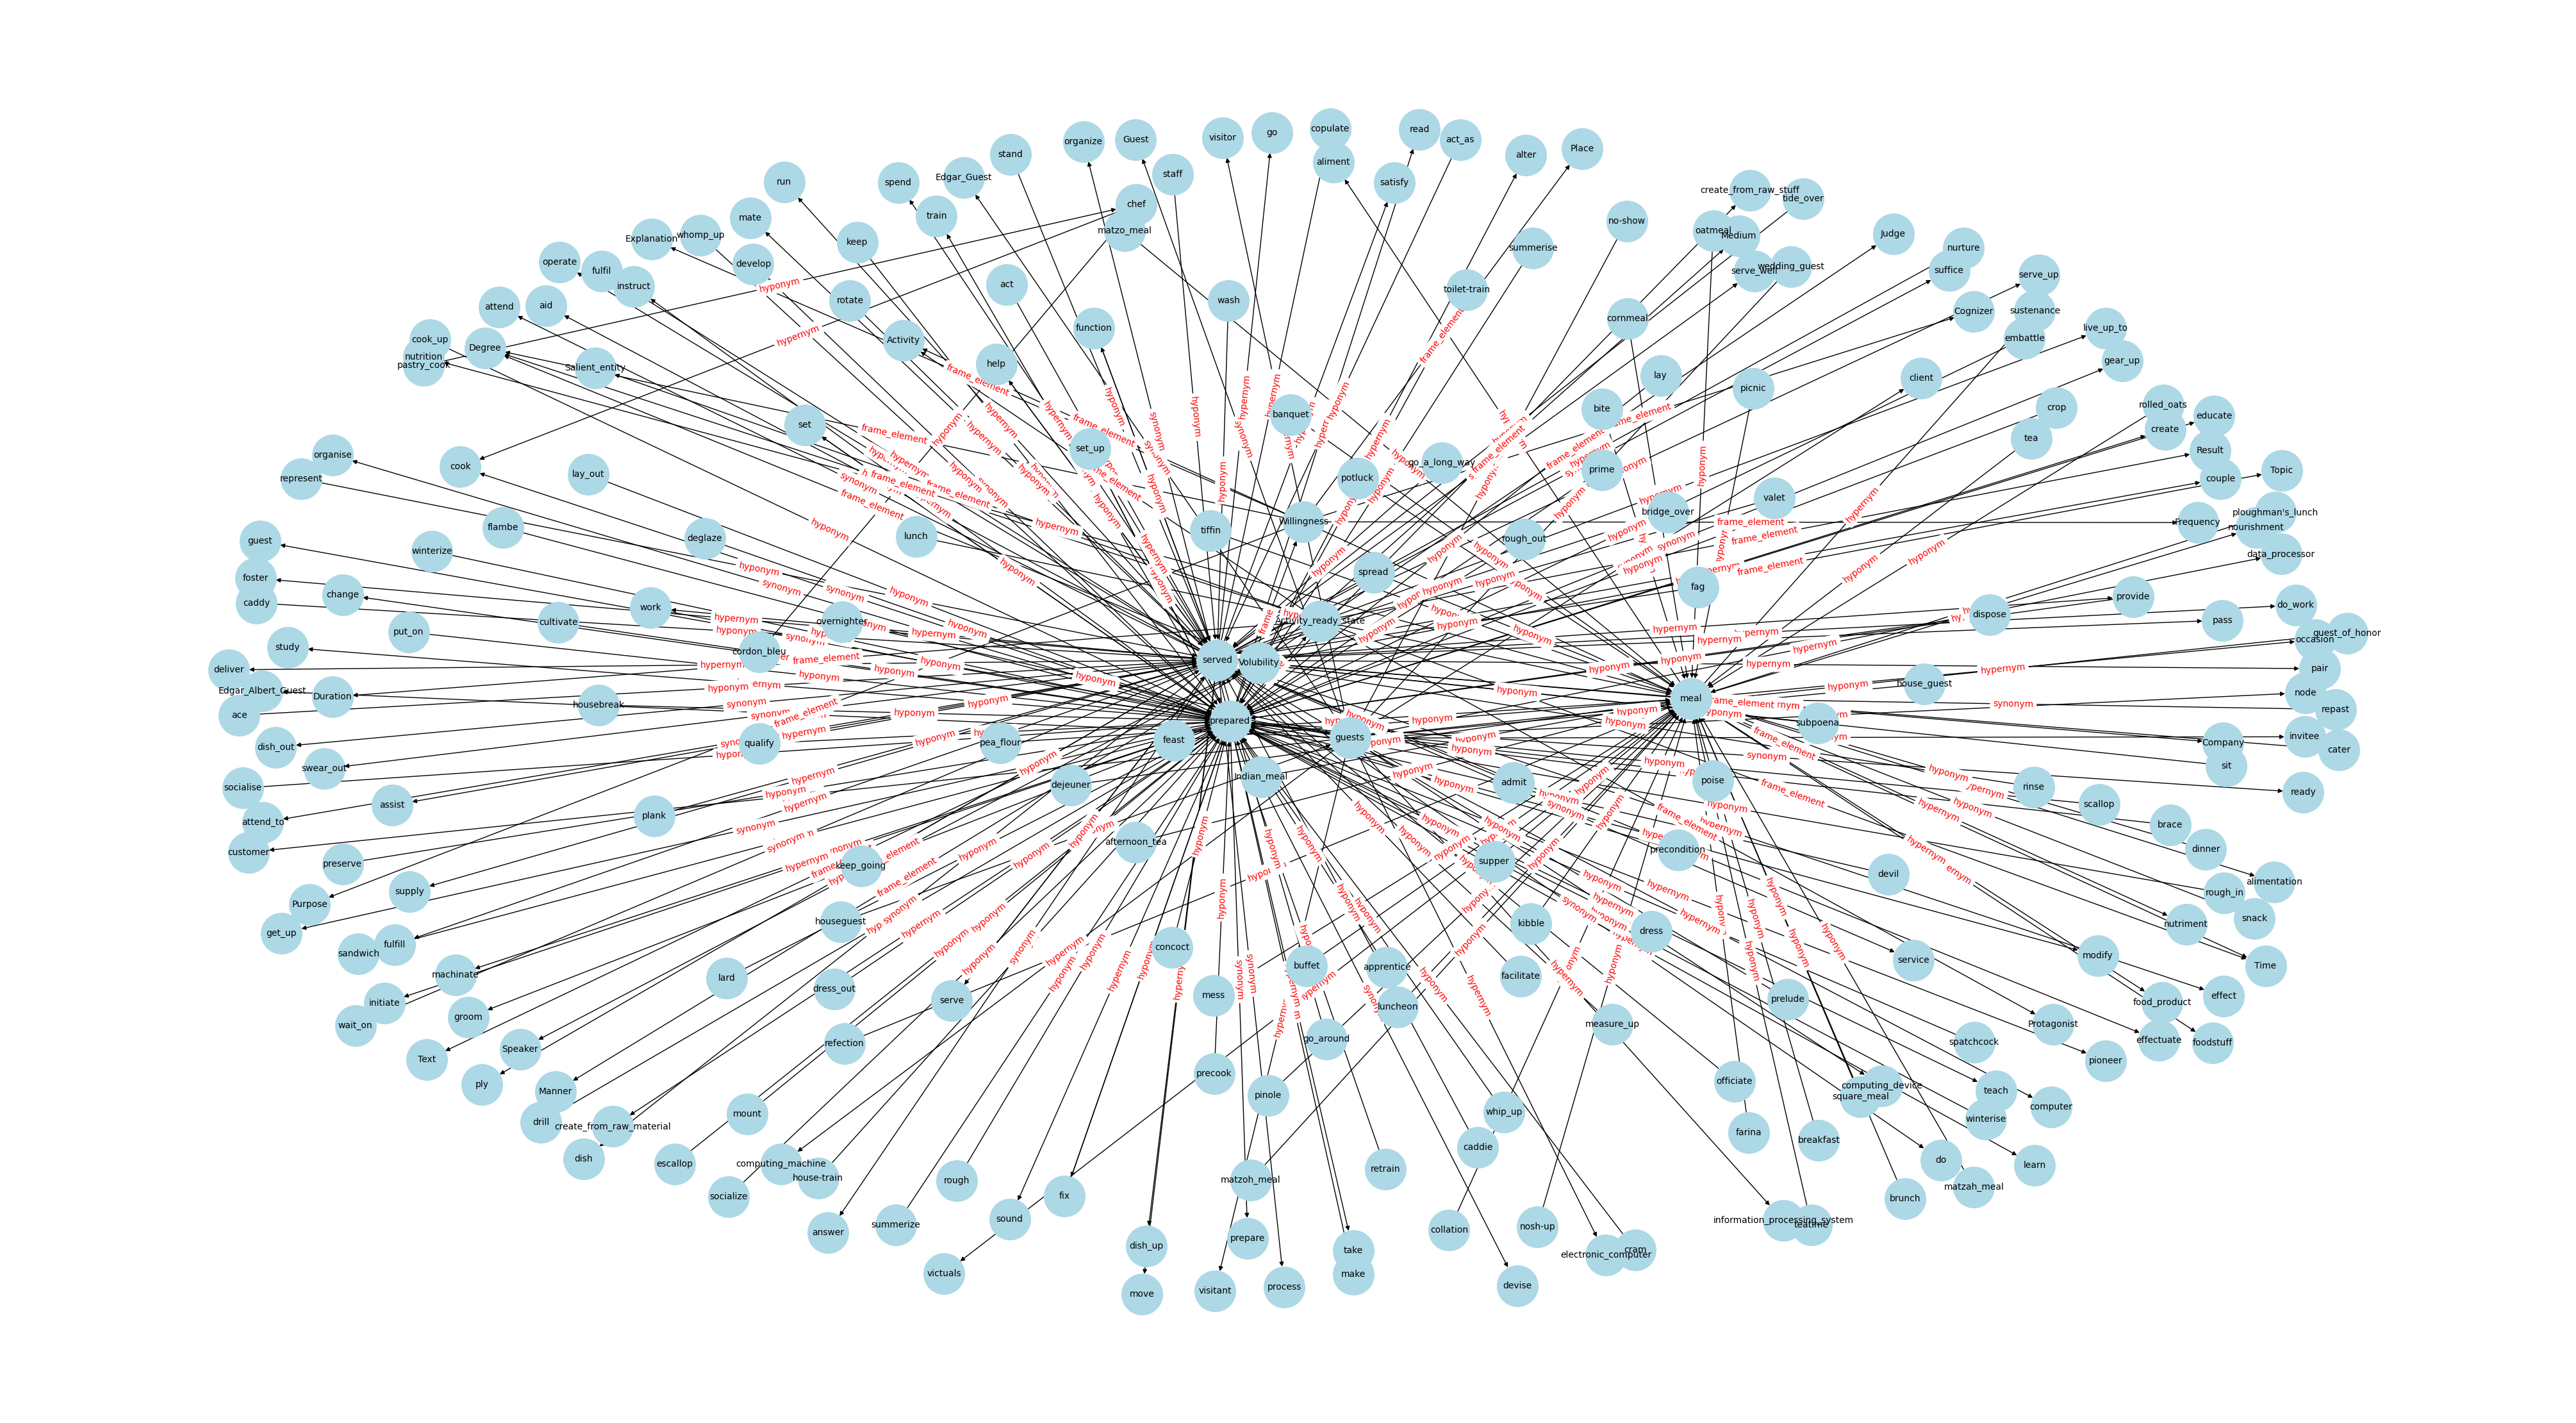

In [38]:
plt.figure(figsize=(40,22))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2100, font_size=10)
edge_labels = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()


# Exercice 3 : Graphe sémantique des noms et verbes

**Phrase à analyser :**  
"Alice bought a laptop from the store. She used the laptop to write a report."

**Instructions :**  
1. Extraire tous les **noms et verbes** de la phrase.  
2. Déterminer leurs **sens corrects** (synsets WordNet).  
3. Construire un **graphe sémantique** incluant :  
   - Les **synsets** comme nœuds.  
   - Les **relations** entre synsets :  
     - **Hyperonyme**  
     - **Hyponyme**  
     - **Méronyme**


In [39]:
sentence = "Alice bought a laptop from the store. She used the laptop to write a report."

tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

# Extraire noms et verbes
nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]

print("Noms :", nouns)
print("Verbes :", verbs)


Noms : ['Alice', 'laptop', 'store', 'laptop', 'report']
Verbes : ['bought', 'used', 'write']


In [40]:
def get_synsets(word, pos_tag):
    if pos_tag.startswith('NN'):
        pos = wn.NOUN
    elif pos_tag.startswith('VB'):
        pos = wn.VERB
    else:
        return []
    return wn.synsets(word, pos=pos)

synsets_dict = {}

for word, pos in pos_tags:
    if pos.startswith('NN') or pos.startswith('VB'):
        synsets_dict[word] = get_synsets(word, pos)
        print(f"{word}: {get_synsets(word, pos)}")


Alice: []
bought: [Synset('buy.v.01'), Synset('bribe.v.01'), Synset('buy.v.03'), Synset('buy.v.04'), Synset('buy.v.05')]
laptop: [Synset('laptop.n.01')]
store: [Synset('shop.n.01'), Synset('store.n.02'), Synset('memory.n.04'), Synset('storehouse.n.01')]
used: [Synset('use.v.01'), Synset('use.v.02'), Synset('use.v.03'), Synset('use.v.04'), Synset('practice.v.04'), Synset('use.v.06')]
laptop: [Synset('laptop.n.01')]
write: [Synset('write.v.01'), Synset('write.v.02'), Synset('publish.v.03'), Synset('write.v.04'), Synset('write.v.05'), Synset('compose.v.02'), Synset('write.v.07'), Synset('write.v.08'), Synset('spell.v.03'), Synset('write.v.10')]
report: [Synset('report.n.01'), Synset('report.n.02'), Synset('report.n.03'), Synset('report.n.04'), Synset('report_card.n.01'), Synset('composition.n.08'), Synset('reputation.n.03')]


In [41]:
G = nx.DiGraph()

def add_wordnet_graph(word):
    synsets = synsets_dict.get(word, [])
    for syn in synsets:
        G.add_node(syn.name())  # Ajouter le synset comme nœud
        # Hyperonymes
        for hyper in syn.hypernyms():
            G.add_node(hyper.name())
            G.add_edge(syn.name(), hyper.name(), relation='hypernym')
        # Hyponymes
        for hypo in syn.hyponyms():
            G.add_node(hypo.name())
            G.add_edge(hypo.name(), syn.name(), relation='hyponym')
        # Méronymes (part meronym)
        for mero in syn.part_meronyms():
            G.add_node(mero.name())
            G.add_edge(syn.name(), mero.name(), relation='part_meronym')

# Ajouter tous les noms et verbes
for word in nouns + verbs:
    add_wordnet_graph(word)


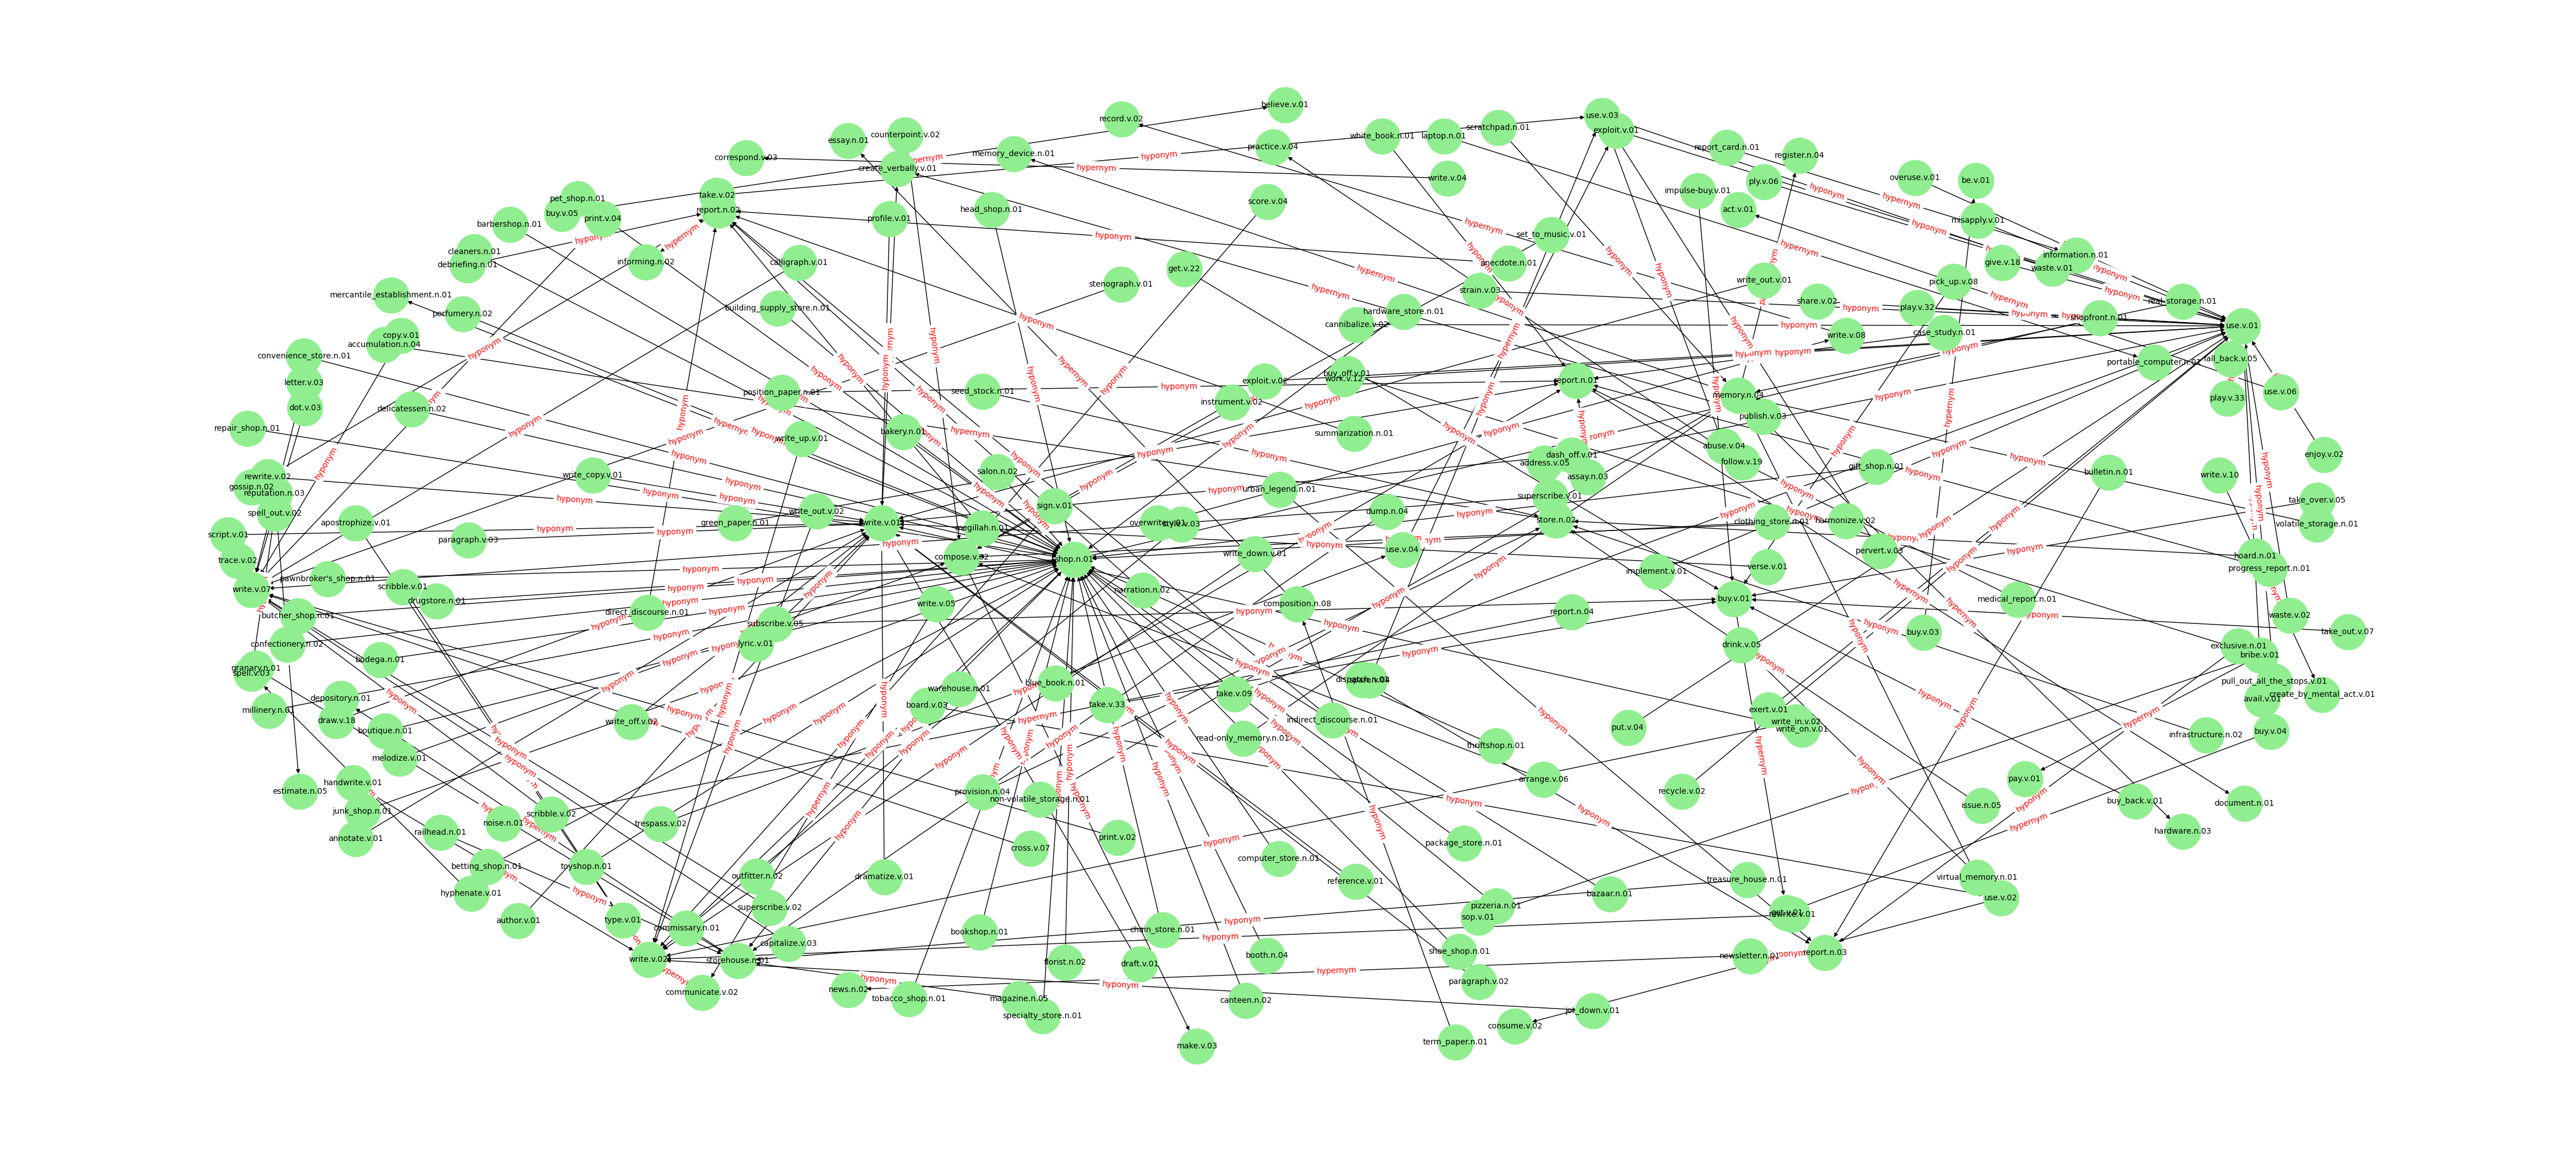

In [42]:
plt.figure(figsize=(45,20))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()


# Exercice 4 : Graphe sémantique des véhicules

**Paragraphe à analyser :**  
"Les voitures, les bus et les vélos sont tous des types de véhicules. Les véhicules sont des 
machines utilisées pour le transport. Les voitures et les bus ont des moteurs, mais les vélos 
n’en ont pas. Les voitures électriques utilisent des batteries au lieu de carburant. Les bus 
peuvent transporter de nombreux passagers, tandis que les voitures en transportent peu. Les 
vélos sont écologiques et nécessitent un effort humain pour se déplacer. Tous les véhicules 
circulent sur les routes, sauf les avions, qui sont aussi un type de véhicule mais se déplacent 
dans le ciel."

**Instructions :**  
1. Trouver tous les **noms** dans le paragraphe et afficher leurs **synsets**.  
2. Pour chaque mot principal, trouver :  
   a. **Hyperonymes**  
   b. **Hyponymes**  
   c. **Méronymes**  
3. Construire un **graphe sémantique** où :  
   a. Chaque mot = un **nœud**  
   b. Les **hyperonymes** = arêtes en **rouge**  
   c. Les **hyponymes** = arêtes en **bleu**  
   d. Les **méronymes** = arêtes en **vert**


In [43]:
paragraph = """
Les voitures, les bus et les vélos sont tous des types de véhicules. Les véhicules sont des 
machines utilisées pour le transport. Les voitures et les bus ont des moteurs, mais les vélos 
n’en ont pas. Les voitures électriques utilisent des batteries au lieu de carburant. Les bus 
peuvent transporter de nombreux passagers, tandis que les voitures en transportent peu. Les 
vélos sont écologiques et nécessitent un effort humain pour se déplacer. Tous les véhicules 
circulent sur les routes, sauf les avions, qui sont aussi un type de véhicule mais se déplacent 
dans le ciel.
"""

# Définir manuellement les noms principaux
nouns = ["voiture", "bus", "vélo", "véhicule", "machine", "transport", 
         "moteur", "batterie", "carburant", "passager", "effort", 
         "route", "avion", "ciel"]

print("Noms :", nouns)


Noms : ['voiture', 'bus', 'vélo', 'véhicule', 'machine', 'transport', 'moteur', 'batterie', 'carburant', 'passager', 'effort', 'route', 'avion', 'ciel']


In [44]:
G = nx.DiGraph()
synsets_dict = {}

# Pour chaque nom, récupérer les synsets
for noun in nouns:
    synsets = wn.synsets(noun, pos=wn.NOUN)
    synsets_dict[noun] = synsets
    print(f"{noun}: {synsets}")
    
    for syn in synsets:
        G.add_node(noun)  # Ajouter le mot principal comme nœud

        # Hypernymes (arêtes rouges)
        for hyper in syn.hypernyms():
            G.add_node(hyper.name())
            G.add_edge(noun, hyper.name(), relation='hypernym', color='red')

        # Hyponymes (arêtes bleues)
        for hypo in syn.hyponyms():
            G.add_node(hypo.name())
            G.add_edge(hypo.name(), noun, relation='hyponym', color='blue')

        # Méronymes (arêtes vertes)
        for mero in syn.part_meronyms():
            G.add_node(mero.name())
            G.add_edge(noun, mero.name(), relation='meronym', color='green')


voiture: []
bus: [Synset('bus.n.01'), Synset('bus_topology.n.01'), Synset('busbar.n.01'), Synset('bus.n.04')]
vélo: []
véhicule: []
machine: [Synset('machine.n.01'), Synset('machine.n.02'), Synset('machine.n.03'), Synset('machine.n.04'), Synset('machine.n.05'), Synset('car.n.01')]
transport: [Synset('conveyance.n.03'), Synset('transport.n.02'), Synset('transportation.n.05'), Synset('ecstasy.n.01'), Synset('tape_drive.n.01'), Synset('transportation.n.02')]
moteur: []
batterie: []
carburant: []
passager: []
effort: [Synset('attempt.n.01'), Synset('effort.n.02'), Synset('feat.n.01'), Synset('campaign.n.02')]
route: [Synset('path.n.03'), Synset('road.n.01')]
avion: []
ciel: []


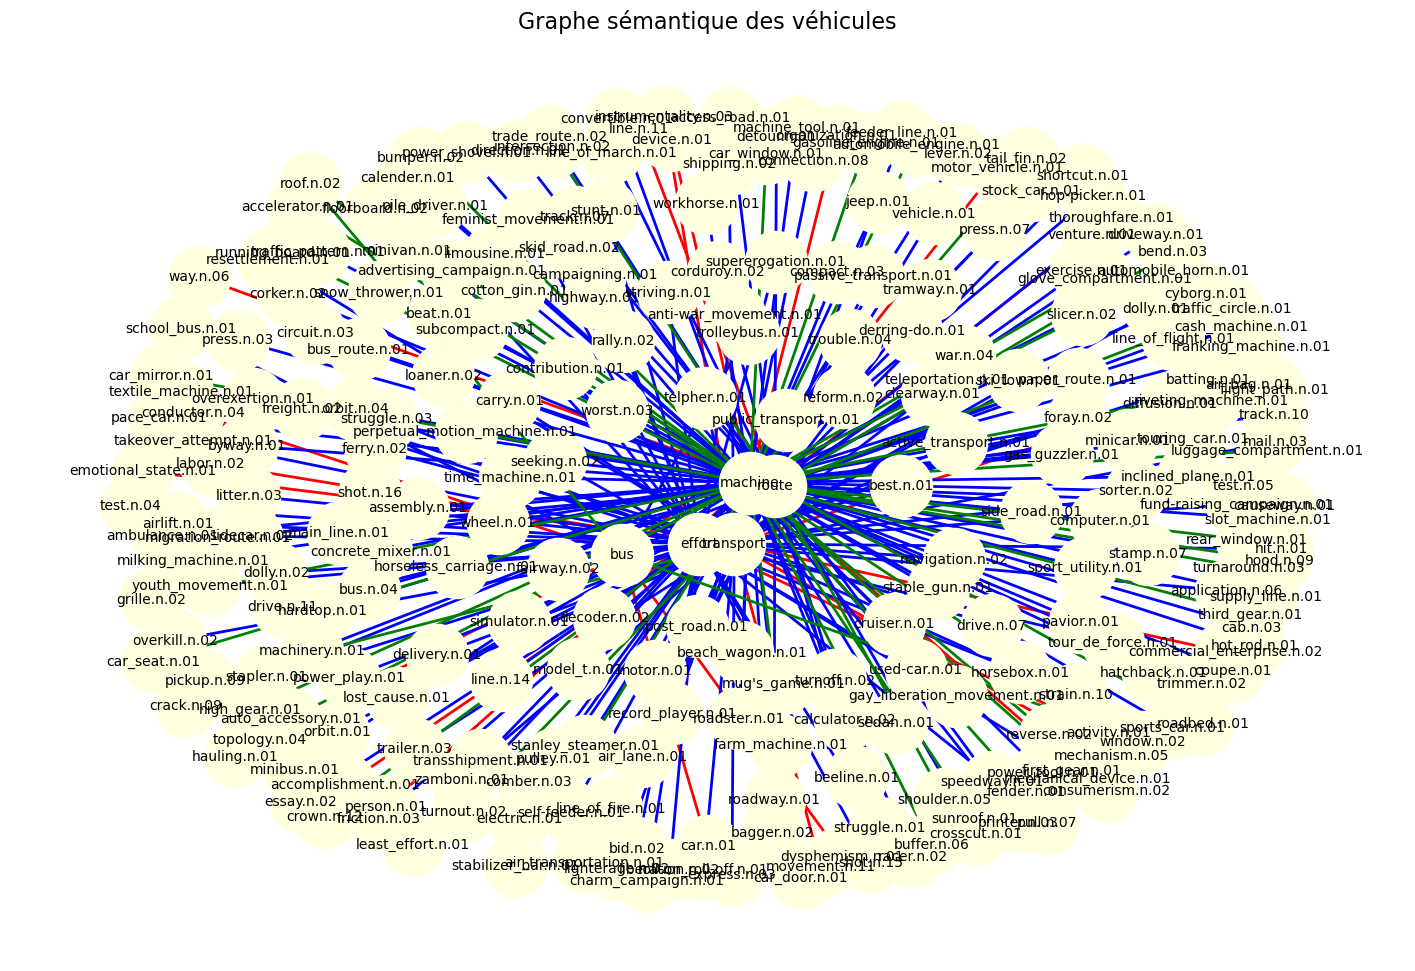

In [45]:
plt.figure(figsize=(18,12))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Dessiner les nœuds
nx.draw_networkx_nodes(G, pos, node_color='lightyellow', node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)

# Dessiner les arêtes par couleur
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=[e for e in edges if e[2]['color']=='red'], edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=[e for e in edges if e[2]['color']=='blue'], edge_color='blue', width=2)
nx.draw_networkx_edges(G, pos, edgelist=[e for e in edges if e[2]['color']=='green'], edge_color='green', width=2)

plt.title("Graphe sémantique des véhicules", fontsize=16)
plt.axis('off')
plt.show()
